<a href="https://colab.research.google.com/github/skywalker290/Machine-Learing/blob/main/Class10_11_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DECISION TREE


## Example of using Decision Tree Classifier for classification task


In [ ]:
from sklearn.datasets import load_iris#Dataset
from sklearn.model_selection import train_test_split#Splitting funciton
from sklearn.tree import DecisionTreeClassifier#Classifier
from sklearn.metrics import accuracy_score#

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#load data set
data= load_iris()
print(type(data))

x,y=data.data, data.target
print(type(x))
print(x.shape)
print(y.shape)

x_t=pd.DataFrame(x);


print(x_t.shape)


<class 'sklearn.utils._bunch.Bunch'>
<class 'numpy.ndarray'>
(150, 4)
(150,)
(150, 4)


In [ ]:
# Split the data into training and testing parts by test_size parameter
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8, random_state=42)

In [ ]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

In [ ]:
# Fit The Model
clf.fit(x_train,y_train);

In [ ]:
# Make Predictions to Test the Model on test data
y_pred= clf.predict(x_test)



# plt.scatter(x_t[0],y,color="black")
# plt.scatter(x_t[1],y)
# plt.scatter(x_t[2],y)
# plt.scatter(x_t[3],y)
# xt=pd.DataFrame(x_test);
# plt.plot(xt[0],y_pred,color="red")

In [ ]:
# calculate the accuracy of the model
accuracy= accuracy_score(y_test,y_pred)
print("Accuracy Score:",accuracy)

Accuracy Score: 0.9333333333333333


# Real Data Testing

In [ ]:
!rm heart-disease.csv
!wget https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv

--2023-07-22 12:53:09--  https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11328 (11K) [text/plain]
Saving to: ‘heart-disease.csv’

heart-disease.csv   100%[===================>]  11.06K  --.-KB/s    in 0s      

2023-07-22 12:53:09 (69.9 MB/s) - ‘heart-disease.csv’ saved [11328/11328]



In [ ]:
#load data
data=pd.read_csv("heart-disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#data clearning
data.isnull().sum()
#data is clean
#lets skip for now

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

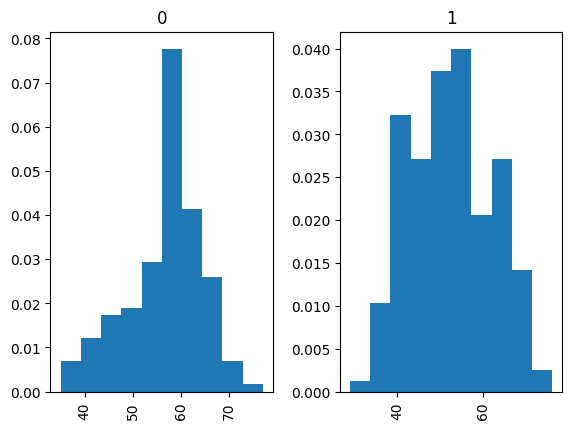

In [ ]:
# data splitting
x=data.drop("target",axis=1)
y=data["target"]

fig, ax=data['age'].hist(y,density=True)
plt.show()

In [ ]:
# create the classification model
cl=DecisionTreeClassifier()

In [ ]:
# splitting the data for training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#Training the model
cl.fit(x_train,y_train);

In [ ]:
y_pred=cl.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)

0.819672131147541


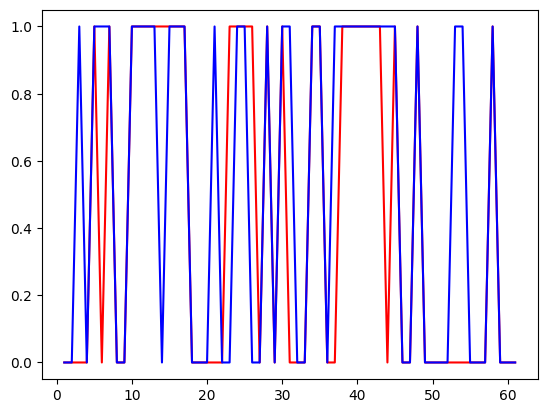

In [ ]:
xpl=np.linspace(1,y_pred.shape[0],y_pred.shape[0])
plt.plot(xpl,y_pred,color="red")
plt.plot(xpl,y_test,color="blue")

# Diffrent Splitting Criteria for DT

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris Dataset
data = load_iris()
x,y=data.data,data.target

In [ ]:
# Splitting The data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Creating the classifier
clf_gini=DecisionTreeClassifier(criterion='gini')#Inequality
clf_entropy=DecisionTreeClassifier(criterion='entropy')#Uncertainity

Gini Index->It is used to measure the inequality of incomes, wealth, anthing such.

Entropy Index->Measure of randomness or uncertainity

In [ ]:
 # Training the model
clf_gini.fit(x_train,y_train);
clf_entropy.fit(x_train,y_train);

In [ ]:
# predicting the data
yp_gini=clf_gini.predict(x_test)
yp_entropy=clf_entropy.predict(x_test)

In [ ]:
# Check the Accuracy Score
accuracy_gini=accuracy_score(yp_gini,y_test)
accuracy_entropy=accuracy_score(yp_entropy,y_test)
print("Gini Accuracy:",accuracy_gini);
print("Entropy Accuracy:",accuracy_entropy)

Gini Accuracy: 1.0
Entropy Accuracy: 1.0


# An Example of uusing DTC iwth Tree Pruning and limiting the tree depth in scikit-learn:

Pruning:Data compression technique to reduce the size of the tree by removing sections of the that are non-critical and redundant to classify instances.



In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#load data
data=load_iris()
x,y=data.data, data.target

#Split Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Create a Decision Tree Classfier with pruning and limiting tree depth
clf=DecisionTreeClassifier(max_depth=3)

# Train the model
clf.fit(x_train,y_train)

# Predict
y_pred=clf.predict(x_test)

# Accuracy
accuracy=accuracy_score(y_pred,y_test)
print("Pruned Accuracy:",accuracy)

Pruned Accuracy: 1.0
